In [2450]:
import random
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [2452]:
df = pd.read_csv('agencia_bsg.csv')

In [2454]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [2456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [2458]:
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [2460]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


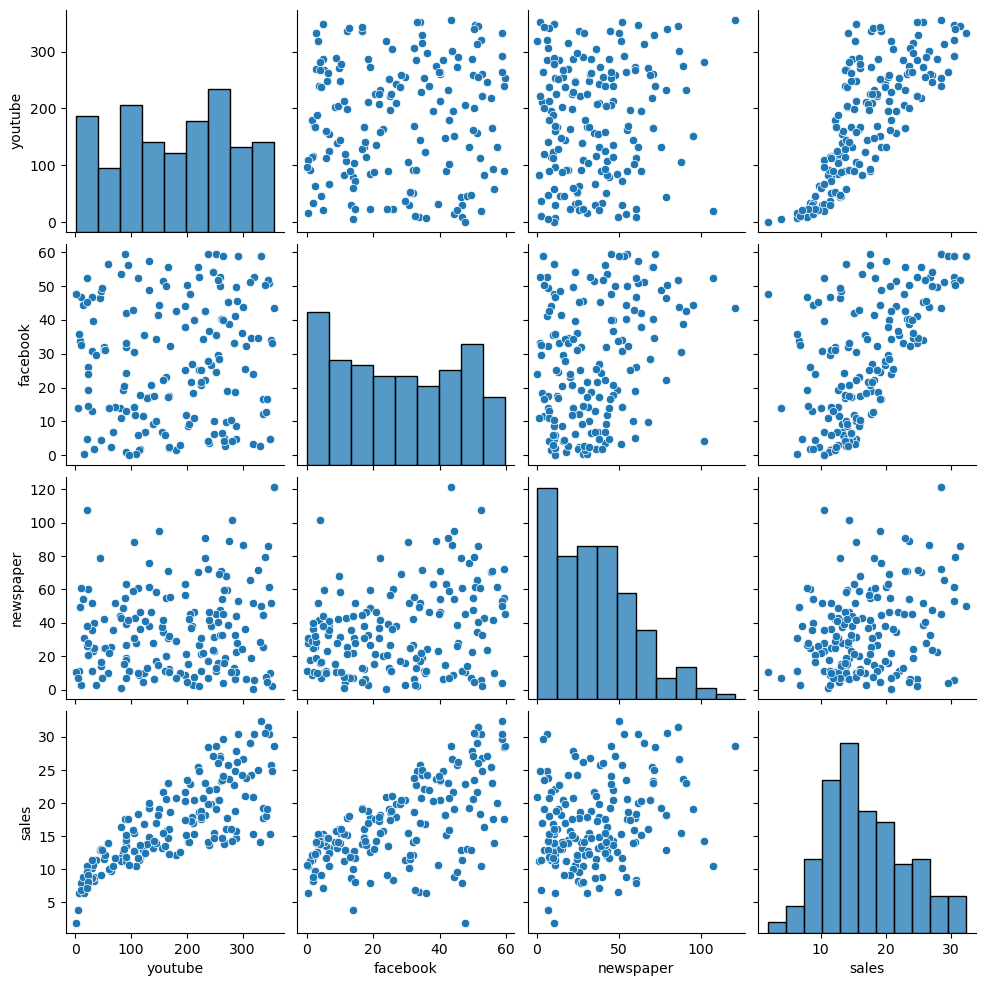

In [2462]:
sns.pairplot(df);

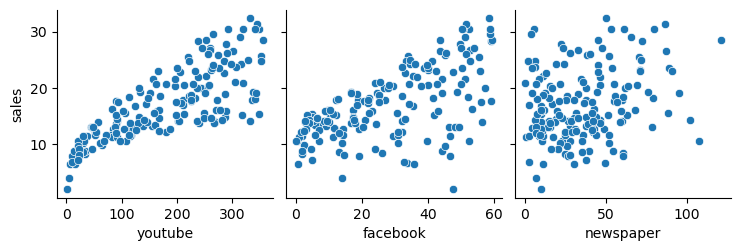

In [2463]:
sns.pairplot(df, x_vars=['youtube','facebook','newspaper'], y_vars="sales");

In [2466]:
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


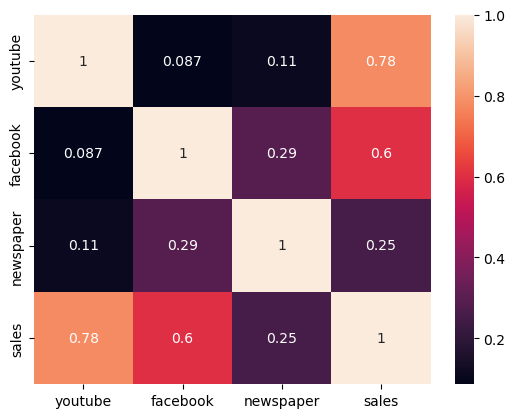

In [2468]:
sns.heatmap(df.corr(), annot=True);

## Construindo novos datasets para deixar o projeto mais robusto

1 - Canais de investimentos

In [2486]:
np.random.seed(42)
n = 50000

data = {
    "youtube investment": np.random.normal(300, 200, n).clip(0),
    "youtube_conversion": np.random.normal(2, 4, n).clip(0),
    "instagram_Investiment": np.random.normal(150, 10, n).clip(0) ,
    "instagram_conversion": np.random.normal(1, 3, n).clip(0),
    "GOOGLE": np.random.exponential(100, n),
    "google_conversion": np.random.normal(1, 8, n).clip(0),
    "newspaper investment": np.random.normal(50, 20, n).clip(0),
    "newspaper_conversion": np.random.normal(1, 8, n).clip(0),
}


In [2488]:
df_investments = pd.DataFrame(data)

In [2490]:
df_investments.head()

,youtube investment,youtube_conversion,instagram_Investiment,instagram_conversion,GOOGLE,google_conversion,newspaper investment,newspaper_conversion
0,399.342831,2.392825,160.305946,5.109634,66.101451,4.059701,56.529545,4.898237
1,272.347140,1.743567,138.446452,0.675205,147.239825,0.000000,77.592848,7.682681
2,429.537708,5.807163,155.754372,0.000000,448.582161,9.263244,7.059979,0.000000
3,604.605971,8.131325,143.807615,5.175882,293.582448,0.000000,108.390371,6.517140
4,253.169325,4.747388,146.725972,0.660470,44.106098,11.368436,31.623392,0.000000


In [2524]:
df_investments = df_investments.rename(columns = {
    "youtube investment":"youtube_investment",
    "GOOGLE":"google_investment",
    "newspaper investment":"newspaper_investment",
    "instagram_Investiment":"instagram_investment"
})

In [2526]:
df_investments.head()

,youtube_investment,youtube_conversion,instagram_investment,instagram_conversion,google_investment,google_conversion,newspaper_investment,newspaper_conversion,youtube_sales,instagram_sales,google_sales,newspaper_sales,total_sales
0,399.342831,2,160.305946,5,66.101451,4,56.529545,4,194.0,485.0,388.0,388.0,1455.0
1,272.347140,1,138.446452,0,147.239825,0,77.592848,7,97.0,0.0,0.0,679.0,776.0
2,429.537708,5,155.754372,0,448.582161,9,7.059979,0,485.0,0.0,873.0,0.0,1358.0
3,604.605971,8,143.807615,5,293.582448,0,108.390371,6,776.0,485.0,0.0,582.0,1843.0
4,253.169325,4,146.725972,0,44.106098,11,31.623392,0,388.0,0.0,1067.0,0.0,1455.0


In [2528]:
df_investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   youtube_investment    50000 non-null  float64
 1   youtube_conversion    50000 non-null  int64  
 2   instagram_investment  50000 non-null  float64
 3   instagram_conversion  50000 non-null  int64  
 4   google_investment     50000 non-null  float64
 5   google_conversion     50000 non-null  int64  
 6   newspaper_investment  50000 non-null  float64
 7   newspaper_conversion  50000 non-null  int64  
 8   youtube_sales         50000 non-null  float64
 9   instagram_sales       50000 non-null  float64
 10  google_sales          50000 non-null  float64
 11  newspaper_sales       50000 non-null  float64
 12  total_sales           50000 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 5.0 MB


In [2530]:
df_investments = df_investments.astype({
    "youtube_conversion":"int64",
    "instagram_conversion":"int64",
    "google_conversion":"int64",
    "newspaper_conversion":"int64",
})

In [2532]:
df_investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   youtube_investment    50000 non-null  float64
 1   youtube_conversion    50000 non-null  int64  
 2   instagram_investment  50000 non-null  float64
 3   instagram_conversion  50000 non-null  int64  
 4   google_investment     50000 non-null  float64
 5   google_conversion     50000 non-null  int64  
 6   newspaper_investment  50000 non-null  float64
 7   newspaper_conversion  50000 non-null  int64  
 8   youtube_sales         50000 non-null  float64
 9   instagram_sales       50000 non-null  float64
 10  google_sales          50000 non-null  float64
 11  newspaper_sales       50000 non-null  float64
 12  total_sales           50000 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 5.0 MB


In [2534]:
df_investments.dtypes

youtube_investment      float64
youtube_conversion        int64
instagram_investment    float64
instagram_conversion      int64
google_investment       float64
google_conversion         int64
newspaper_investment    float64
newspaper_conversion      int64
youtube_sales           float64
instagram_sales         float64
google_sales            float64
newspaper_sales         float64
total_sales             float64
dtype: object

In [2536]:
df_investments['youtube_sales'] = df_investiments['youtube_conversion'] * 97.00
df_investments['instagram_sales'] = df_investiments['instagram_conversion'] * 97.00
df_investments['google_sales'] = df_investiments['google_conversion'] * 97.00
df_investments['newspaper_sales'] = df_investiments['newspaper_conversion'] * 97.00

In [2538]:
df_investments.head()

,youtube_investment,youtube_conversion,instagram_investment,instagram_conversion,google_investment,google_conversion,newspaper_investment,newspaper_conversion,youtube_sales,instagram_sales,google_sales,newspaper_sales,total_sales
0,399.342831,2,160.305946,5,66.101451,4,56.529545,4,194.0,485.0,388.0,388.0,1455.0
1,272.347140,1,138.446452,0,147.239825,0,77.592848,7,97.0,0.0,0.0,679.0,776.0
2,429.537708,5,155.754372,0,448.582161,9,7.059979,0,485.0,0.0,873.0,0.0,1358.0
3,604.605971,8,143.807615,5,293.582448,0,108.390371,6,776.0,485.0,0.0,582.0,1843.0
4,253.169325,4,146.725972,0,44.106098,11,31.623392,0,388.0,0.0,1067.0,0.0,1455.0


In [2540]:
df_investments.describe()

,youtube_investment,youtube_conversion,instagram_investment,instagram_conversion,google_investment,google_conversion,newspaper_investment,newspaper_conversion,youtube_sales,instagram_sales,google_sales,newspaper_sales,total_sales
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,305.808349,2.462240,150.035700,1.45252,100.264952,3.441680,49.912000,3.483380,238.837280,140.894440,333.842960,337.887860,1051.462540
std,188.420337,2.848883,9.995761,1.93085,100.227898,4.855664,19.897118,4.870901,276.341688,187.292412,470.999382,472.477414,744.642036
min,0.000000,0.000000,110.006678,0.00000,0.000849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.274958,0.000000,143.283809,0.00000,29.022183,0.000000,36.406184,0.000000,0.000000,0.000000,0.000000,0.000000,485.000000
50%,300.347880,2.000000,150.031235,0.00000,69.749003,0.000000,49.830258,1.000000,194.000000,0.000000,0.000000,97.000000,970.000000
75%,435.412069,4.000000,156.780928,3.00000,138.951870,6.000000,63.298085,6.000000,388.000000,291.000000,582.000000,582.000000,1552.000000
max,1195.816850,17.000000,195.621147,12.00000,952.748984,34.000000,128.363700,31.000000,1649.000000,1164.000000,3298.000000,3007.000000,5141.000000


In [2542]:
df_investments['total_sales'] = df_investments['youtube_sales'] + df_investments['instagram_sales'] + df_investments['google_sales'] + df_investments['newspaper_sales']

In [2544]:
df_investments.head()

,youtube_investment,youtube_conversion,instagram_investment,instagram_conversion,google_investment,google_conversion,newspaper_investment,newspaper_conversion,youtube_sales,instagram_sales,google_sales,newspaper_sales,total_sales
0,399.342831,2,160.305946,5,66.101451,4,56.529545,4,194.0,485.0,388.0,388.0,1455.0
1,272.347140,1,138.446452,0,147.239825,0,77.592848,7,97.0,0.0,0.0,679.0,776.0
2,429.537708,5,155.754372,0,448.582161,9,7.059979,0,485.0,0.0,873.0,0.0,1358.0
3,604.605971,8,143.807615,5,293.582448,0,108.390371,6,776.0,485.0,0.0,582.0,1843.0
4,253.169325,4,146.725972,0,44.106098,11,31.623392,0,388.0,0.0,1067.0,0.0,1455.0


In [2546]:
df_investments.describe()

,youtube_investment,youtube_conversion,instagram_investment,instagram_conversion,google_investment,google_conversion,newspaper_investment,newspaper_conversion,youtube_sales,instagram_sales,google_sales,newspaper_sales,total_sales
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,305.808349,2.462240,150.035700,1.45252,100.264952,3.441680,49.912000,3.483380,238.837280,140.894440,333.842960,337.887860,1051.462540
std,188.420337,2.848883,9.995761,1.93085,100.227898,4.855664,19.897118,4.870901,276.341688,187.292412,470.999382,472.477414,744.642036
min,0.000000,0.000000,110.006678,0.00000,0.000849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.274958,0.000000,143.283809,0.00000,29.022183,0.000000,36.406184,0.000000,0.000000,0.000000,0.000000,0.000000,485.000000
50%,300.347880,2.000000,150.031235,0.00000,69.749003,0.000000,49.830258,1.000000,194.000000,0.000000,0.000000,97.000000,970.000000
75%,435.412069,4.000000,156.780928,3.00000,138.951870,6.000000,63.298085,6.000000,388.000000,291.000000,582.000000,582.000000,1552.000000
max,1195.816850,17.000000,195.621147,12.00000,952.748984,34.000000,128.363700,31.000000,1649.000000,1164.000000,3298.000000,3007.000000,5141.000000


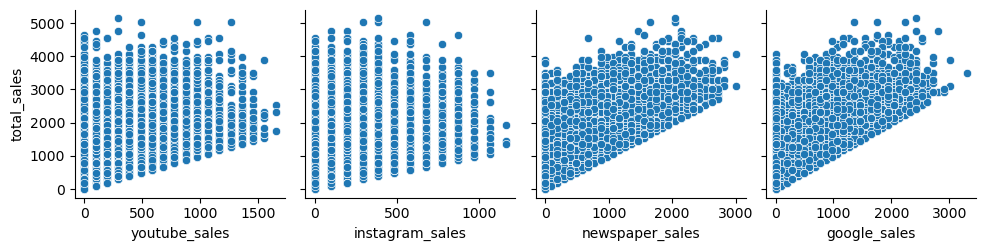

In [2548]:
sns.pairplot(df_investments, x_vars=['youtube_sales','instagram_sales','newspaper_sales', 'google_sales'], y_vars="total_sales");

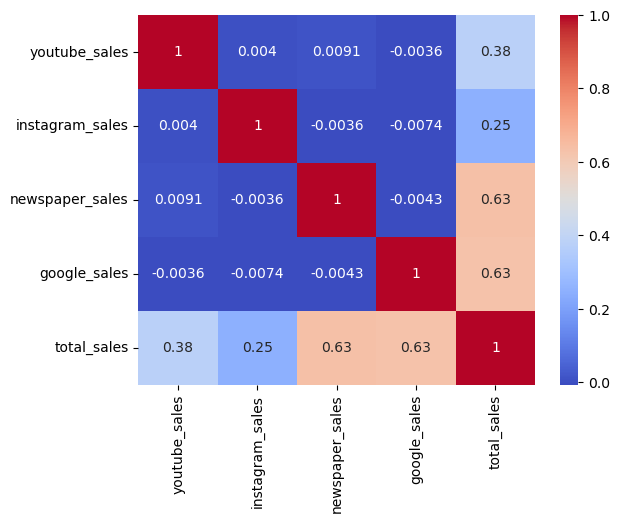

In [2549]:
selected_columns = ['youtube_sales','instagram_sales','newspaper_sales', 'google_sales','total_sales']
correlation_matrix = df_investments[selected_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm");

In [2550]:
df_investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   youtube_investment    50000 non-null  float64
 1   youtube_conversion    50000 non-null  int64  
 2   instagram_investment  50000 non-null  float64
 3   instagram_conversion  50000 non-null  int64  
 4   google_investment     50000 non-null  float64
 5   google_conversion     50000 non-null  int64  
 6   newspaper_investment  50000 non-null  float64
 7   newspaper_conversion  50000 non-null  int64  
 8   youtube_sales         50000 non-null  float64
 9   instagram_sales       50000 non-null  float64
 10  google_sales          50000 non-null  float64
 11  newspaper_sales       50000 non-null  float64
 12  total_sales           50000 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 5.0 MB


In [2554]:
df_analytics = pd.DataFrame({
    "canal": ["YouTube","Instagram","Google","Newspaper"],
    "Quanto cada canal trouxe de receita": [
        df_investments["youtube_sales"].sum(),
        df_investments["instagram_sales"].sum(),
        df_investments["google_sales"].sum(),
        df_investments["newspaper_sales"].sum(),
    ],
    "Quanto foi investido em cada canal": [
        df_investments["youtube_investment"].sum(),
        df_investments["instagram_investment"].sum(),
        df_investments["google_investment"].sum(),
        df_investments["newspaper_investment"].sum()
    ],
    "Quanto de conversão por canal": [
        df_investments["youtube_conversion"].sum(),
        df_investments["instagram_conversion"].sum(),
        df_investments["google_conversion"].sum(),
        df_investments["newspaper_conversion"].sum()
    ],
    "Despesas - Receita": [
        df_investments["youtube_sales"].sum() - df_investments["youtube_investment"].sum(),
        df_investments["instagram_sales"].sum() - df_investments["instagram_investment"].sum(),
        df_investments["google_sales"].sum() - df_investments["google_investment"].sum(),
        df_investments["newspaper_sales"].sum() - df_investments["newspaper_investment"].sum()
    ]
})

In [2556]:
df_analytics.head()

,canal,Quanto cada canal trouxe de receita,Quanto foi investido em cada canal,Quanto de conversão por canal,Despesas - Receita
0,YouTube,11941864.0,1.529042e+07,123112,-3.348553e+06
1,Instagram,7044722.0,7.501785e+06,72626,-4.570630e+05
2,Google,16692148.0,5.013248e+06,172084,1.167890e+07
3,Newspaper,16894393.0,2.495600e+06,174169,1.439879e+07


In [2558]:
df_analytics['Quanto cada canal trouxe de receita'] = df_analytics['Quanto cada canal trouxe de receita'].apply(lambda x: f"{x:,.2f}")
df_analytics['Quanto foi investido em cada canal'] = df_analytics['Quanto foi investido em cada canal'].apply(lambda x: f"{x:,.2f}")
df_analytics['Quanto de conversão por canal'] = df_analytics['Quanto de conversão por canal'].apply(lambda x: f"{x:,}")
df_analytics['Despesas - Receita'] = df_analytics['Despesas - Receita'].apply(lambda x: f"{x:,.2f}")

df_analytics.head()


,canal,Quanto cada canal trouxe de receita,Quanto foi investido em cada canal,Quanto de conversão por canal,Despesas - Receita
0,YouTube,"11,941,864.00","15,290,417.44","123,112","-3,348,553.44"
1,Instagram,"7,044,722.00","7,501,785.02","72,626","-457,063.02"
2,Google,"16,692,148.00","5,013,247.60","172,084","11,678,900.40"
3,Newspaper,"16,894,393.00","2,495,600.01","174,169","14,398,792.99"


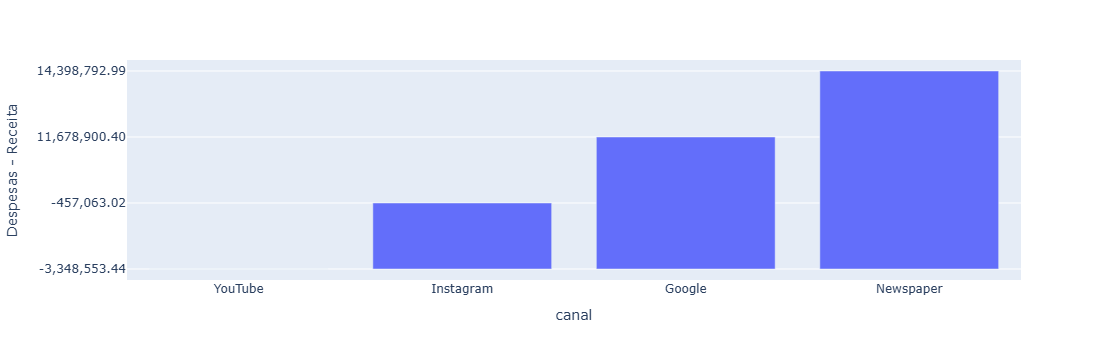

In [2560]:
px.bar(df_analytics, x = "canal", y = "Despesas - Receita")

In [2562]:
df_investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   youtube_investment    50000 non-null  float64
 1   youtube_conversion    50000 non-null  int64  
 2   instagram_investment  50000 non-null  float64
 3   instagram_conversion  50000 non-null  int64  
 4   google_investment     50000 non-null  float64
 5   google_conversion     50000 non-null  int64  
 6   newspaper_investment  50000 non-null  float64
 7   newspaper_conversion  50000 non-null  int64  
 8   youtube_sales         50000 non-null  float64
 9   instagram_sales       50000 non-null  float64
 10  google_sales          50000 non-null  float64
 11  newspaper_sales       50000 non-null  float64
 12  total_sales           50000 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 5.0 MB


In [2564]:
filtered_data = df_investments[["google_investment","google_conversion","google_sales","newspaper_investment","newspaper_conversion","newspaper_sales"]]

In [2566]:
filtered_data.head()

,google_investment,google_conversion,google_sales,newspaper_investment,newspaper_conversion,newspaper_sales
0,66.101451,4,388.0,56.529545,4,388.0
1,147.239825,0,0.0,77.592848,7,679.0
2,448.582161,9,873.0,7.059979,0,0.0
3,293.582448,0,0.0,108.390371,6,582.0
4,44.106098,11,1067.0,31.623392,0,0.0


# Treinamento do modelo

In [2569]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2571]:
X = filtered_data[["google_investment","newspaper_investment"]]
y = filtered_data[["google_conversion","google_sales","newspaper_conversion","newspaper_sales"]]

In [2573]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

In [2575]:
model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [2576]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Eror (Para cada saída): ", mse)

Mean Squared Eror (Para cada saída):  [2.39399581e+01 2.25251066e+05 2.39931929e+01 2.25751952e+05]


# Output:

In [2578]:
user_input = pd.DataFrame({
    "google_investment": [1000],
    "newspaper_investment": [1000]
})

In [2579]:
predictions = model.predict(user_input)

In [2580]:
resultado_for_user = pd.DataFrame(predictions, columns=[
    "google_conversion",
    "google_sales",
    "newspaper_conversion",
    "newspaper_sales"
])

In [2581]:
print("Resultado para os investimentos: ")
print(resultado_for_user)

Resultado para os investimentos: 
   google_conversion  google_sales  newspaper_conversion  newspaper_sales
0           9.006891    873.668472             11.642557      1129.328019
